<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 29, 2016: class
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Lecture notes of today (November 29, 2016) class in Python about frequences, ChiSquared distribution and statistical tests.
</div>

In [160]:
from sympy import *
from sympy import stats

import sys

from random import randint, randrange, normalvariate, shuffle
from collections import Counter, defaultdict

from itertools import permutations
from statistics import mean

sys.setrecursionlimit(10000000)
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [110]:
t, m, i, k, n, z = symbols('t m i k n z')
a, b = IndexedBase('a'), IndexedBase('b')

# Frequencies

In [11]:
[randint(1, 10) for i in range(5)]

In [298]:
def test_randint(n, N):
    rand = lambda: randint(1, n)
    return Counter(rand() for _ in range(N))

In [299]:
freqs = test_randint(10, 500)
freqs

In [300]:
def draw_frequencies_histogram(seq, bins, normed=None, pdf=None):
    
    if callable(pdf):
        normed=True
        domain, theo_fn = pdf(seq)
        plt.plot(domain, [theo_fn(i) for i in domain], 'b')
    
    n, bins, patches = plt.hist(seq, bins, normed=normed, facecolor='green', alpha=0.5)
    
    plt.grid(True)
    plt.show()

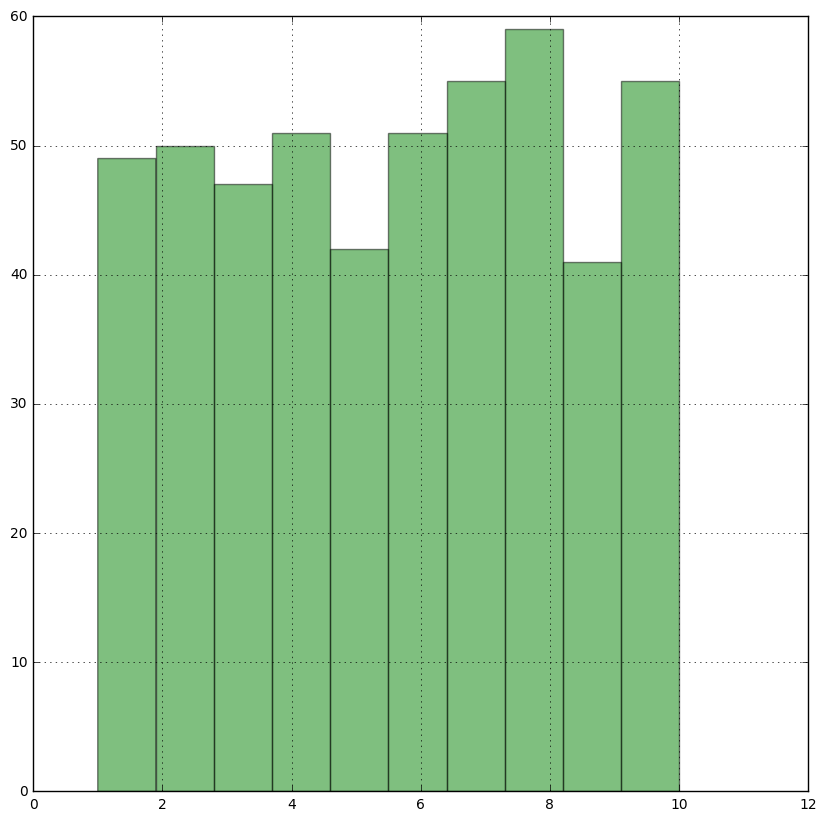

In [301]:
draw_frequencies_histogram(list(freqs.elements()), bins=len(freqs),)

# $\chi^{2}$ pdf
- https://en.wikipedia.org/wiki/Chi-squared_distribution
- http://docs.sympy.org/dev/modules/stats.html#sympy.stats.Chi

In [286]:
def ChiSquared_distribution(z, k):
    X_Chi_rv = stats.ChiSquared(symbols('x'), k)
    pdf = stats.density(X_Chi_rv)
    return Lambda([z], pdf(z))

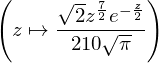

In [287]:
ChiSquared_fn = ChiSquared_distribution(z, len(freqs)-1)
ChiSquared_fn

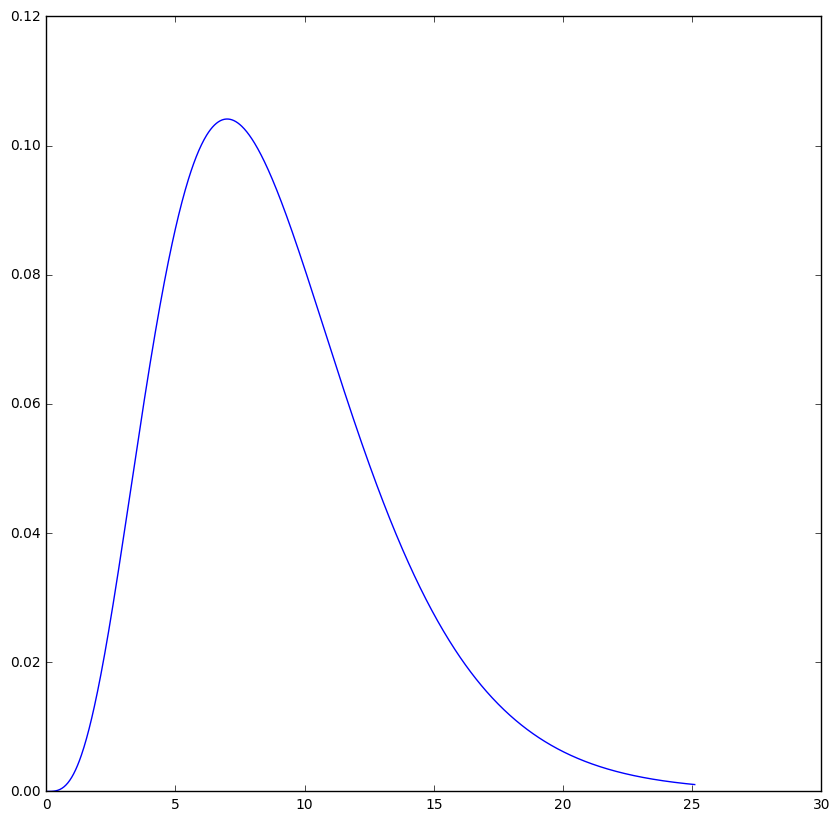

In [288]:
from numpy import linspace

domain = linspace(0, max(float_mapped), 1e3)
plt.plot(domain, [ChiSquared_fn(i) for i in domain], 'b')
None

In [289]:
def Chi_square_observed(freqs):
    f = sum(freqs.values())/Integer(len(freqs))
    return sum(Integer(f-v)**2 for v in freqs.values())/f

In [290]:
Chi_square_observed(freqs)

In [273]:
M = 1000
experiment = list(map(Chi_square_observed, [test_randint(10, 2000) for i in range(M)]))

In [291]:
float_mapped = sorted(map(lambda c: float(c), experiment))

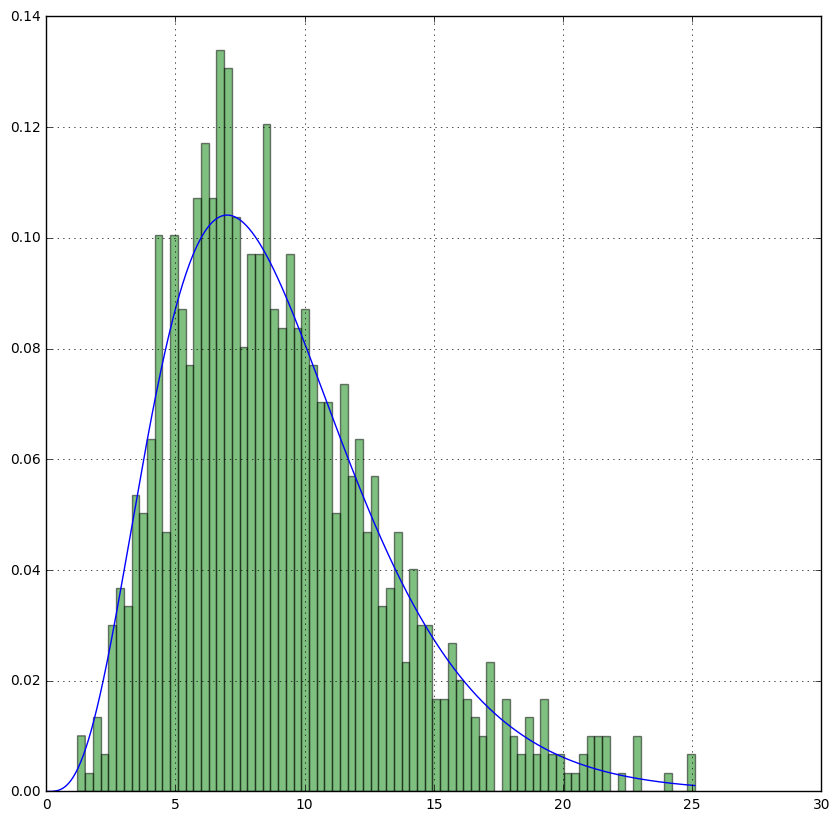

In [292]:
draw_frequencies_histogram(float_mapped, 80, pdf=lambda seq: (linspace(0, max(seq), 1e3), ChiSquared_fn) )

# $\mathcal{N}$ pdf

In [293]:
def Normal_distribution(z, mean, std):
    Normal_rv = stats.Normal(symbols('x'), mean, std)
    pdf = stats.density(Normal_rv)
    return Lambda([z], pdf(z))

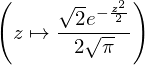

In [294]:
Normal_fn = Normal_distribution(z, 0, 1)
Normal_fn

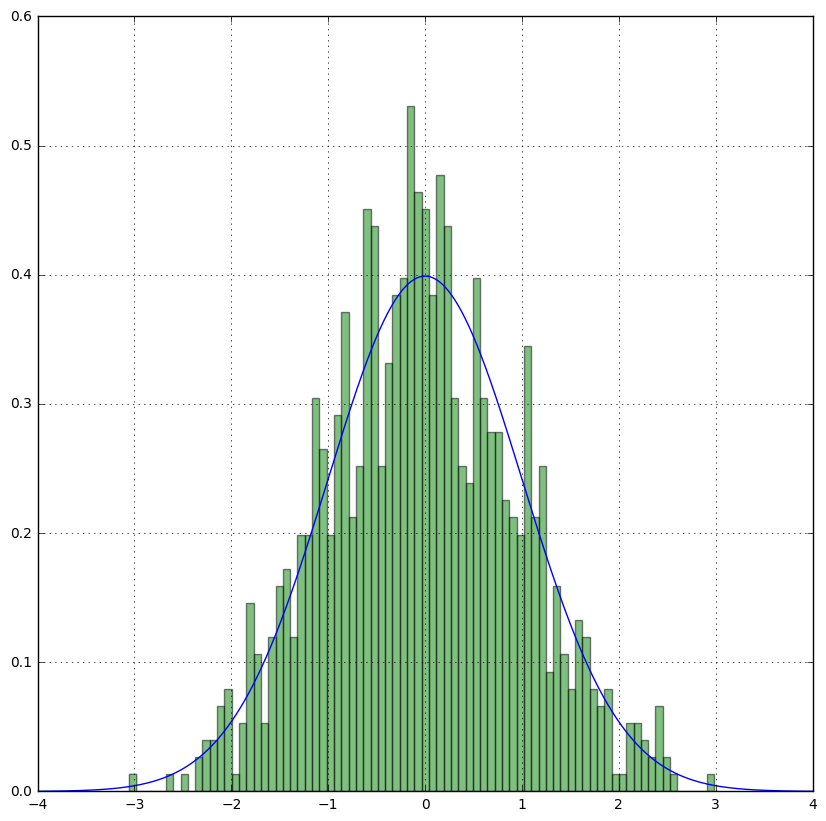

In [297]:
N = 1000
draw_frequencies_histogram([normalvariate(0, 1) for _ in range(N)], 80, 
                           pdf=lambda seq: (linspace(-4, 4, 1e3), Normal_fn))

# Permutations

In [247]:
def rand_perm(seq, N):
    l = list(seq)
    table = []
    for j in range(N):
        shuffle(l)
        table.append(tuple(l))
    return Counter(table)

In [180]:
a = IndexedBase('a')
rand_perm([a[i] for i in range(5)], 1000)

In [181]:
factorial(5)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.